<a href="https://colab.research.google.com/github/AJ-Horch/grounded_data_analyst/blob/main/analsying_moive_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# need to open the raw github file to import the file
admissions_url = "https://raw.githubusercontent.com/AJ-Horch/grounded_data_analyst/refs/heads/main/admissions.csv"
admissions = pd.read_csv(admissions_url)

In [ ]:
admissions.head()

,Year,Month,Admissions (million)
0,2018,January,16.2
1,2018,February,16.1
2,2018,March,13.5
3,2018,April,15.5
4,2018,May,13.7


In [ ]:
genres_url = "hhttps://raw.githubusercontent.com/AJ-Horch/grounded_data_analyst/refs/heads/main/genres%20(1).csv"
distributors_url = "https://raw.githubusercontent.com/AJ-Horch/grounded_data_analyst/refs/heads/main/distributors%20(2).csv"

genres = pd.read_csv(genres_url)
distributors = pd.read_csv(distributors_url)

genres.head()


,Year,Genre,Number of\nreleases,Gross box\noffice\n(£ million),Top performing title,Number of releases,Gross box office (£ million)
0,2018,Action,77.0,361.3,Avengers: Infinity War,NaN,NaN
1,2018,Animation,46.0,242.2,Incredibles 2,NaN,NaN
2,2018,Drama,246.0,154.1,A Star Is Born,NaN,NaN
3,2018,Comedy,144.0,88.3,Johnny English Strikes Again,NaN,NaN
4,2018,Biopic,5.0,78.5,Bohemian Rhapsody,NaN,NaN


In [ ]:
distributors.head()

,Year,Distributor,Market share\n(%),Films on release\nin 2018,Box office gross\n(£ million),Market Share,Flimns on release,Box office gross (£ million),Market share,Films on release
0,2018,Walt Disney,23.6,24.0,325.6,NaN,NaN,NaN,NaN,NaN
1,2018,Universal,19.5,40.0,268.5,NaN,NaN,NaN,NaN,NaN
2,2018,20th Century Fox,14.5,28.0,199.3,NaN,NaN,NaN,NaN,NaN
3,2018,Warner Bros,13.9,31.0,191.4,NaN,NaN,NaN,NaN,NaN
4,2018,Sony,10.7,33.0,146.8,NaN,NaN,NaN,NaN,NaN


### Divide the dataset
Divide the dataset into three periods: pre-COVID, COVID, Post-Covid. To do this I'll create a date column

In [ ]:
admissions.tail()

,Year,Month,Admissions (million)
43,2021,August,10.4
44,2021,September,6.5
45,2021,October,16.4
46,2021,November,8.8
47,2021,December,13.5


I need to add a spacebetween the day and month for the next bit of code to work

In [ ]:
COVID_START_DATE = datetime.datetime(2020, 3, 1)
LOCKDOWN_END_DATE = datetime.datetime(2021, 7, 1)


In [ ]:

admissions["date"] = (
    "1 " +
    admissions["Month"] +
    " " +
    admissions["Year"].astype(str)
)

admissions["date"] = pd.to_datetime(admissions["date"], format="%d %B %Y")
admissions.head()

,Year,Month,Admissions (million),date
0,2018,January,16.2,2018-01-01
1,2018,February,16.1,2018-02-01
2,2018,March,13.5,2018-03-01
3,2018,April,15.5,2018-04-01
4,2018,May,13.7,2018-05-01


In [ ]:
admissions.tail()

,Year,Month,Admissions (million),date
43,2021,August,10.4,2021-08-01
44,2021,September,6.5,2021-09-01
45,2021,October,16.4,2021-10-01
46,2021,November,8.8,2021-11-01
47,2021,December,13.5,2021-12-01


Apply the cutoff dates to the data. I'll use the Categorial data type in pandas to ensure the correct order is observed when sorting; otherwise, these periods would be sorted alphabetcially.

In [ ]:
admissions.loc[admissions['date'] <= COVID_START_DATE, "covid_period"] = 'pre-COVID'
admissions.loc[admissions['date'].between(COVID_START_DATE, LOCKDOWN_END_DATE, 'left'), 'covid_period'] = 'during COVID'
admissions.loc[admissions['date'] >= LOCKDOWN_END_DATE, 'covid_period'] = 'post-lockdown'

# make it categorical
admissions['covid_period'] = (
    pd.Categorical(
        admissions['covid_period'],
        categories=['pre-COVID', 'during COVID', 'post-lockdown'],
        ordered=True
    )
)

admissions['covid_period'].value_counts(dropna=False)

,count
covid_period,
pre-COVID,26
during COVID,16
post-lockdown,6


In [ ]:
admissions.tail(10)

,Year,Month,Admissions (million),date,covid_period
38,2021,March,NaN,2021-03-01,during COVID
39,2021,April,NaN,2021-04-01,during COVID
40,2021,May,3.5,2021-05-01,during COVID
41,2021,June,7.0,2021-06-01,during COVID
42,2021,July,7.8,2021-07-01,post-lockdown
43,2021,August,10.4,2021-08-01,post-lockdown
44,2021,September,6.5,2021-09-01,post-lockdown
45,2021,October,16.4,2021-10-01,post-lockdown
46,2021,November,8.8,2021-11-01,post-lockdown
47,2021,December,13.5,2021-12-01,post-lockdown


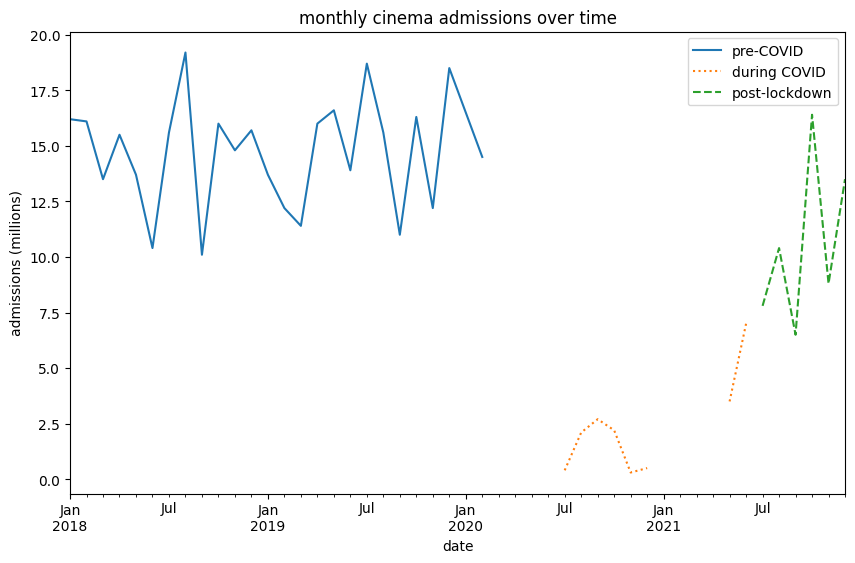

In [ ]:
fig, axis = plt.subplots(figsize=(10, 6))

linestyles = ['solid', 'dotted', 'dashed']

for idx, covid_period in enumerate(admissions['covid_period'].value_counts().index):
  (
      admissions
      .query(f"covid_period=='{covid_period}'")
      .set_index("date")
      ["Admissions (million)"]
      .plot(ax=axis, label=covid_period, linestyle=linestyles[idx])
  )

axis.set(
      title="monthly cinema admissions over time",
      ylabel="admissions (millions)"
  )

axis.legend()

plt.show()




There's a clear dropoff when covid hit and then a smal bump with some during covid. It appears as though things began reutning to pre-pandmemic levels. It would be interesting to add more post-pandemic data to this, check out seasonality.

Next I'll look t the average monthly admissions in the three periods

<ipython-input-23-e1a3e6b53e22>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('covid_period')


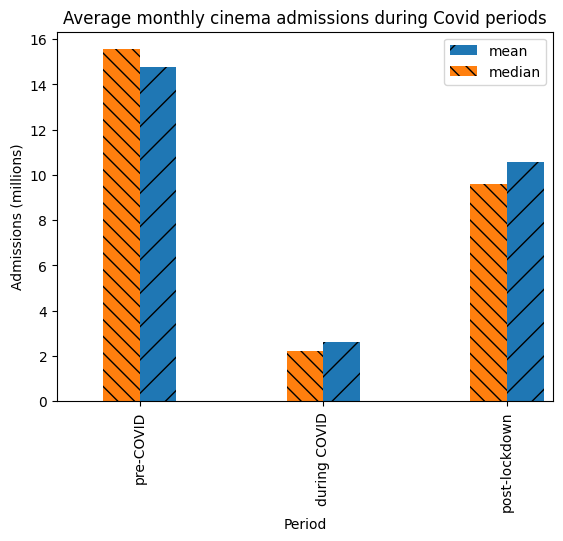

In [ ]:
fig, axis = plt.subplots()

admissions_by_period = (
    admissions
    .groupby('covid_period')
    ["Admissions (million)"]
    .agg(['mean', 'median'])
)

# Create a barplot for each metric with differnt hatch patterns
for i, metric in enumerate(admissions_by_period.columns):
  hatch="/" if i == 0 else "\\\\" # different hatch patterns for different metrics
  color = "C0" if i == 0 else "C1" # Different colors for different colors
  admissions_by_period[metric].plot(kind='bar', ax=axis, position=i,
                                    hatch=hatch, label=metric, width=0.2, color=color)

axis.set(
    title="Average monthly cinema admissions during Covid periods",
    ylabel="Admissions (millions)",
    xlabel="Period",
    xticklabels = admissions_by_period.index
)

axis.legend()

plt.show()

I looked at both the mean and median to investigae whether the data is skewed in either direction. Do pre-covid or post-lockdown months tend to have outliers in either direction? Will use histograms to investigate further.

Interesting that in the above graph, the mean and median revseres.

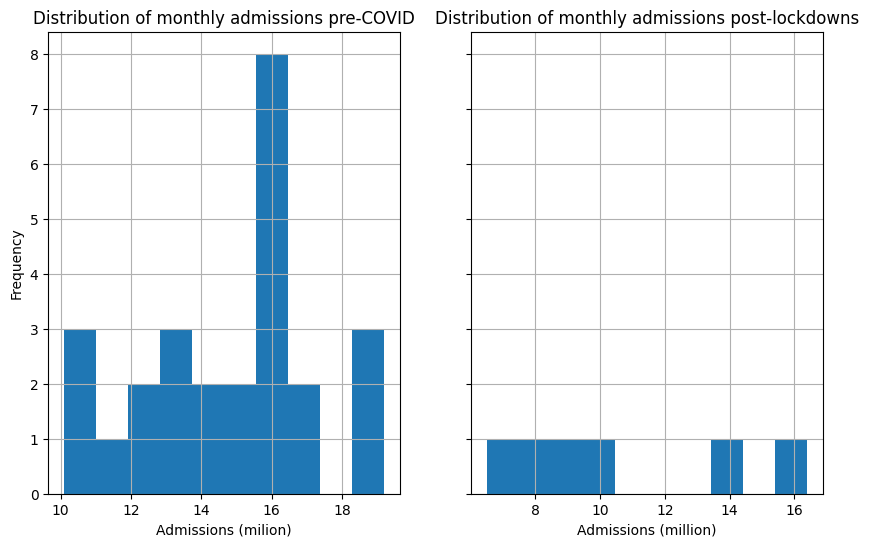

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

(
    admissions
    .loc[admissions['covid_period'] == 'pre-COVID', 'Admissions (million)']
    .hist(bins=10, ax=axes[0])
)

axes[0].set(
    title="Distribution of monthly admissions pre-COVID",
    xlabel="Admissions (milion)",
    ylabel="Frequency"
)

(
    admissions
    .loc[admissions['covid_period'] == 'post-lockdown', 'Admissions (million)']
    .hist(ax=axes[1])
)

axes[1].set(
    title="Distribution of monthly admissions post-lockdowns",
    xlabel='Admissions (million)'
)

plt.show()

There is less data post-lockdowns and because of the low intitial numbers we have more of a right skew (pre-COVIF we havd more of the left skew)

Going to look at monthly admission patterns

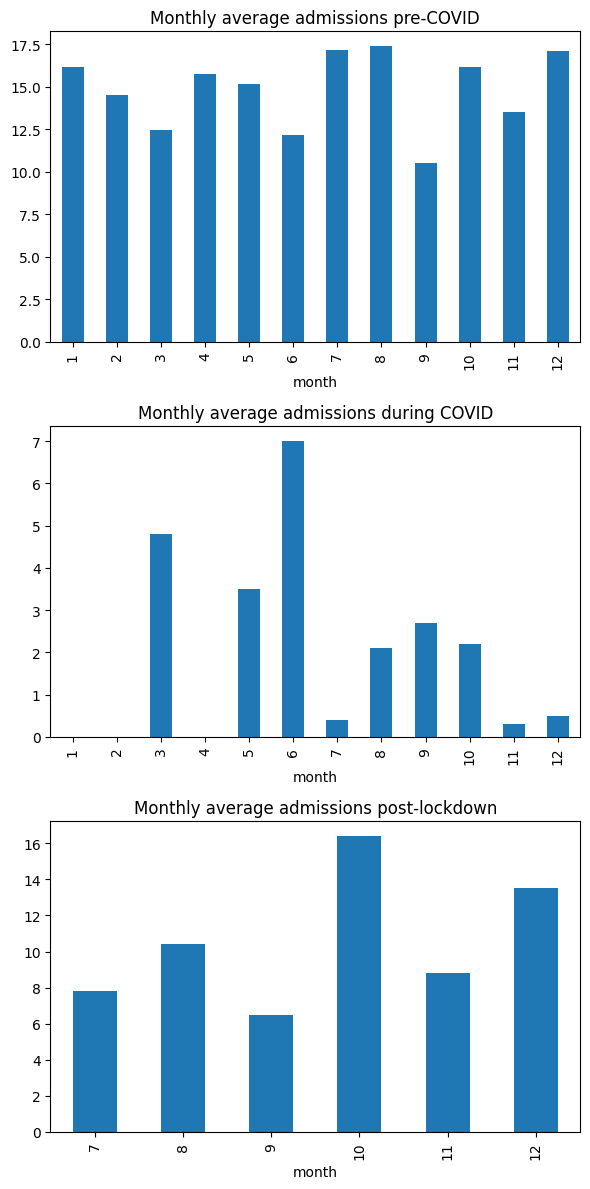

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(6,12))

for idx, period in enumerate(admissions['covid_period'].unique()):
  (
      admissions.assign(month=admissions['date'].dt.month) # format date
      .query(f"covid_period == '{period}'")
      .groupby('month')
      ["Admissions (million)"]
      .median()
      .plot
      .bar(ax=axes[idx])
  )

  axes[idx].set(
      title=f"Monthly average admissions {period}"
  )

plt.tight_layout()
plt.show()

Admissions have not returned to pre-covid trends (yet). might need to get more data

# Genres

In [ ]:
genres.head()


,Year,Genre,Number of\nreleases,Gross box\noffice\n(£ million),Top performing title,Number of releases,Gross box office (£ million)
0,2018,Action,77.0,361.3,Avengers: Infinity War,NaN,NaN
1,2018,Animation,46.0,242.2,Incredibles 2,NaN,NaN
2,2018,Drama,246.0,154.1,A Star Is Born,NaN,NaN
3,2018,Comedy,144.0,88.3,Johnny English Strikes Again,NaN,NaN
4,2018,Biopic,5.0,78.5,Bohemian Rhapsody,NaN,NaN


In [ ]:
distributors.head()

,Year,Distributor,Market share\n(%),Films on release\nin 2018,Box office gross\n(£ million),Market Share,Flimns on release,Box office gross (£ million),Market share,Films on release
0,2018,Walt Disney,23.6,24.0,325.6,NaN,NaN,NaN,NaN,NaN
1,2018,Universal,19.5,40.0,268.5,NaN,NaN,NaN,NaN,NaN
2,2018,20th Century Fox,14.5,28.0,199.3,NaN,NaN,NaN,NaN,NaN
3,2018,Warner Bros,13.9,31.0,191.4,NaN,NaN,NaN,NaN,NaN
4,2018,Sony,10.7,33.0,146.8,NaN,NaN,NaN,NaN,NaN


Need to rerun cleaning file and remove \n figures

In [ ]:
# need to fix